# Group A
This code is for understanding the **k-means** algorithm. 
Follow the instructions mentioned before every function and run the codes for 
* 1, 5, 15 iterations 
* For 5 different intialization of centroids 
* Number of clusters : 2, 3, 5

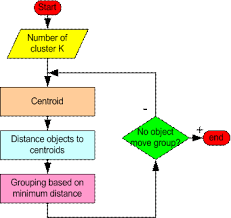

In [1]:
from IPython.display import Image
Image(filename='data/index.png')

In [4]:
# Add required packages. 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb #visualization package
from scipy.io import loadmat #load .mat files
%matplotlib inline

In [29]:
def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)
    
    for i in range(k):
        centroids[i,:] = X[idx[i],:] #Chooses init centroids from data randomly
    
    return centroids

Below is the function to find the closest centroids. The input to this function is the dataset X and the centroids. Write a line of  code in order to **compute the distance** between the data point and each centroid.

In [43]:
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sqrt(np.sum((X[i,:]-centroids[j,:])**2))
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    
    return idx

Load the data and call the first function to form intial clusters and visualize the intial clusters.

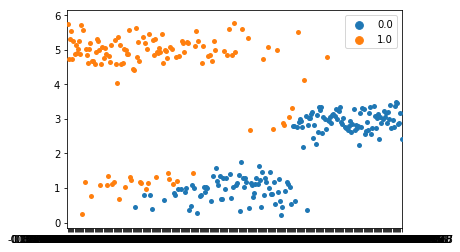

In [67]:
data = loadmat('data/GroupA.mat')
X = data['X']
k=2
initial_centroids = init_centroids(X,k)
initial_centroids
idx = find_closest_centroids(X, initial_centroids)
idx[0:3]
ax = sb.swarmplot(x=X[:,0],y=X[:,1],hue=idx)
ax

In [89]:
for i in range(2):
    ind = np.where(idx==i)
    
ind1=np.array([0,1])
X[ind1]
np.average(X[ind1],axis=0)

array([3.75033133, 4.70376783])

In this function we compute new centroids for from the clusters. Write a line of code to **compute the centroid**

In [90]:
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
# compute the new centroids   
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = np.average(X[indices],axis=0)
    
    return centroids

Below is the function where we run kmeans and optimize the clusters. Call the function we defined above in proper sequence following the flow chart above.

In [91]:
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    # 1. Call function to initial_centroids
    centroids = init_centroids(X,k)
    for i in range(max_iters):
        # 2. Form intial cluster by finding the distance from centroids
        idx = find_closest_centroids(X, centroids)
        # 3. Update the centroids
        centroids = compute_centroids(X, idx, k)
    
    return idx, centroids

In [94]:
# Main function where give intput for no of iterations for optimization.
initial_centroids = initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx, centroids = run_k_means(X, initial_centroids, 100)

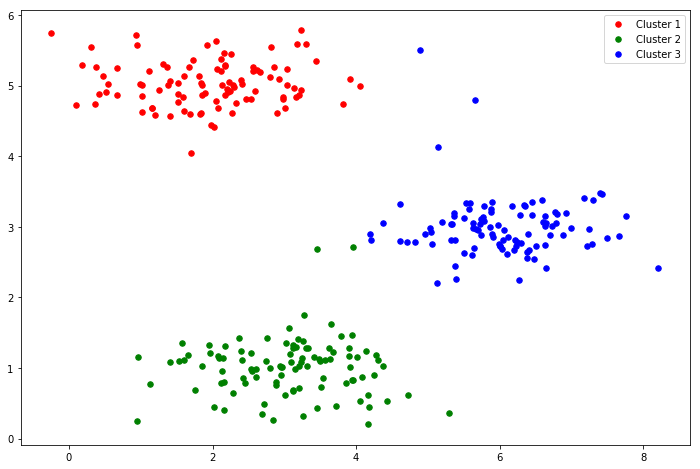

In [95]:
# Visualization
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]


fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()

Bonus:
    Enlist 5 different prantical applications of k means.
    Implement Group D excersice.

# Group B
Our next task is to apply K-means to image compression. The intuition here is that we can use clustering to find a 
small number of colors that are most representative of the image, and map the original 24-bit colors to a 
lower-dimensional color space using the cluster assignments. 

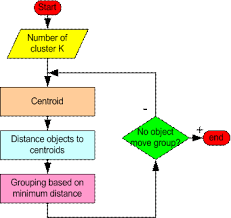

In [1]:
from IPython.display import Image
Image(filename='data/index.png')

In [3]:
# Add required packages. 
import numpy as np # Fast array-processing package
import pandas as pd #  To deal with structured data e.g (tabular, multidimensional, potentially heterogeneous) 
import matplotlib.pyplot as plt# For visualization 
import seaborn as sb # For statistical data visualization
from scipy.io import loadmat # library used for scientific computing and technical computing
%matplotlib inline

Here we intialize the centroids for the clusters. write a line of code to **randomly initialize** the centroid.

In [4]:
def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)
    
    for i in range(k):
        centroids[i,:] = X[idx[i],:]
    
    return centroids

Below is the function to find the closest centroids. The input to this function is the dataset X and the centroids. Write a line of  code in order to **compute the distance** between the data point and each centroid.

In [5]:
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            #dist = np.sqrt(np.sum((X[i,:]-centroids[j,:])**2))
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    
    return idx

In this function we compute new centroids for from the clusters. Write a line of code to **compute the centroid**

In [6]:
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
# compute the new centroids   
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = np.average(X[indices],axis=0)
    
    return centroids

Below is the function where we run kmeans and optimize the clusters. Call the function we defined above in proper sequence following the flow chart above.

In [7]:
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    # 1. Call function to initial_centroids
    centroids = init_centroids(X,k)
    for i in range(max_iters):
        # 2. Form intial cluster by finding the distance from centroids
        idx = find_closest_centroids(X,centroids)
        # 3. Update the centroids
        centroids = compute_centroids(X,idx,k)
    
    return idx, centroids

In [24]:
#from IPython.display import Image
from PIL import Image

#Image(filename='data/bird_small.png')
#w,h=Image.size
im = Image.open('data/bird_small.png')
width, height = im.size
print(width,height)

128 128


In [14]:

image_data = loadmat('data/bird_small.mat')
image_data
A = image_data['A']
A.shape
# normalize value ranges
A = A / 255.
# reshape the array
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
X.shape
# randomly initialize the centroids using the function defined above for 16 clusters
initial_centroids = init_centroids(X,k=16)
# run the algorithm for 10 iterations using the function above
# Bonus run for 5, 10 , 15, 20 iterations
idx, centroids = run_k_means(X,initial_centroids,max_iters=10)
# get the closest centroids one last time using the function to find the closest centroid
idx = find_closest_centroids(X,centroids)

49152

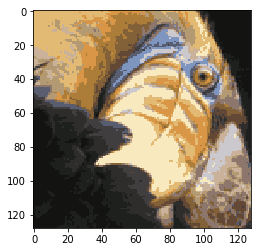

In [17]:

# map each pixel to the centroid value
X_recovered = centroids[idx.astype(int),:]
X_recovered.shape

# reshape to the original dimensions
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))
X_recovered.shape
plt.imshow(X_recovered)
X_recovered.size

# Group C
## Principal component analysis

PCA is a linear transformation that finds the "principal components", or directions of greatest variance, in a data 
set. It can be used for dimension reduction among other things. In this exercise we're first tasked with implementing 
PCA and applying it to a simple 2-dimensional data set to see how it works. Let's start off by loading and visualizing
the data set.


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
%matplotlib inline

In [26]:
#Load the data 
data = loadmat('data/GroupC.mat')

In [30]:
X = data['X']

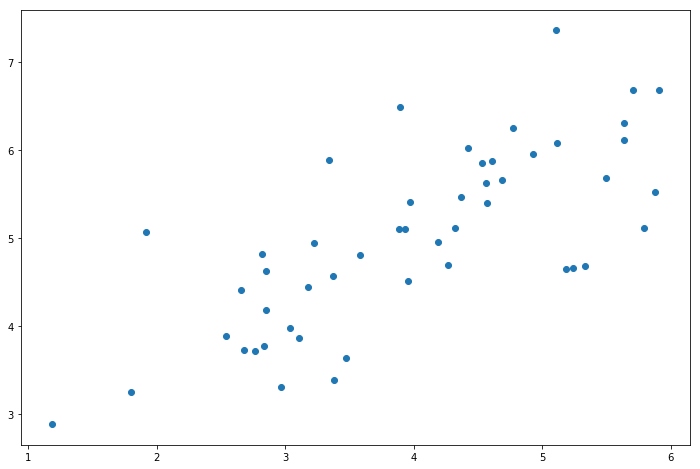

In [27]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:, 0], X[:, 1])

 Here we difine the function for PCA. Write a few lines of code to 
* normalize the data
* Computing the covariance matrix
* Performing SVD

In [115]:
a = np.array([[2,4],[1,3],[0,0],[0,0]])
U, S, V = np.linalg.svd(a)
V.shape

(2, 2)

In [169]:
def pca(X):
    # normalize the features
    X = (X-np.mean(X,axis=0))
    
    # compute the covariance matrix
    X = np.matrix(X)
    cov = np.cov(X,rowvar=False)
    
    # perform SVD
    U, S, V = np.linalg.svd(cov)
    
    return U, S, V

U, S, V = pca(X)

c=np.dot(np.dot(U,S),V)
c.shape

(2,)

In [14]:
Now that we have the principal components (matrix U), we can use these to project the original data into a lower-
dimensional space. For this task write a line in the a function that computes the projection and **selects only the top K 
components**, effectively reducing the number of dimensions.

SyntaxError: invalid syntax (<ipython-input-14-ea74567147f4>, line 1)

In [170]:
def project_data(X, U, k):
    U_reduced = U[:k,:]
    return np.dot(X, U_reduced.T)
Z = project_data(X, U, 1)
Z
def recover_data(X, U, k):
    U_reduced = U[:,:k]
    return np.dot(X, U_reduced.T)
X_recovered = recover_data(Z, U, 1)
U_reduced.T.shape

(1, 2)

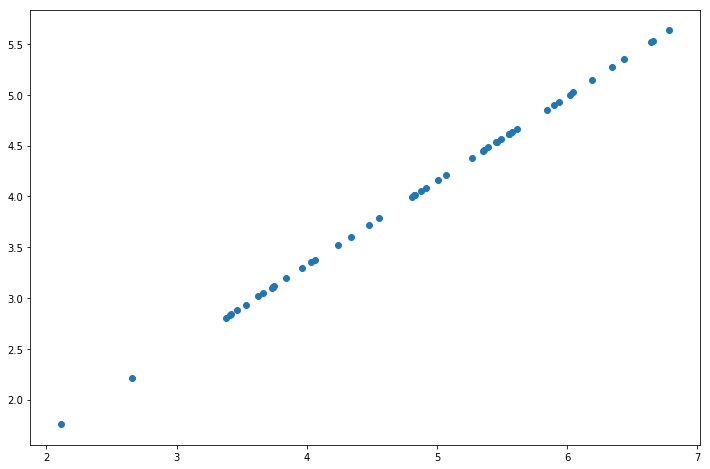

In [175]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter([X_recovered[:, 0]],[X_recovered[:, 1]])

# Group D
## Application of Principal component analysis

PCA is a linear transformation that finds the "principal components", or directions of greatest variance, in a data 
set. It can be used for dimension reduction among other things. In this exercise we're first tasked with implementing 
PCA and applying it to a simple 2-dimensional data set to see how it works.  Our task here is to apply PCA to images of faces.  By using the same dimension reduction 
techniques we can capture the "essence" of the images using much less data than the original images.

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
%matplotlib inline

Load the face image

In [179]:
import hdf5storage
faces = hdf5storage.loadmat('data/GroupD.mat')
#faces = loadmat('data/GroupD.mat')
X = faces['X']
X.shape
face = np.reshape(X[3,:], (32, 32))
plt.imshow(face)

ModuleNotFoundError: No module named 'hdf5storage'

 Here we difine the function for PCA. Write a few lines of code to 
* normalize the data
* Computing the covariance matrix
* Performing SVD

In [19]:
def pca(X):
    # normalize the features
    X = 
    
    # compute the covariance matrix
    X = np.matrix(X)
    cov = 
    
    # perform SVD
    U, S, V = 
    
    return U, S, V

SyntaxError: invalid syntax (<ipython-input-19-856ac270d390>, line 3)

In [20]:
U, S, V = pca(X)
U, S, V

NameError: name 'pca' is not defined

Now that we have the principal components (matrix U), we can use these to project the original data into a lower-
dimensional space. For this task write a line in the a function that computes the projection and **selects only the top K 
components**, effectively reducing the number of dimensions.

In [21]:
def project_data(X, U, k):
    U_reduced = 
    return np.dot(X, U_reduced)
Z = project_data(X, U, 1)
Z
def recover_data(Z, U, k):
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)
X_recovered = recover_data(Z, U, 1)
X_recovered

SyntaxError: invalid syntax (<ipython-input-21-976583ad5767>, line 2)

In [22]:
U, S, V = pca(X)
Z = project_data(X, U, 100)

NameError: name 'pca' is not defined

In [23]:
X_recovered = recover_data(Z, U, 100)
face = np.reshape(X_recovered[3,:], (32, 32))
plt.imshow(face)

NameError: name 'recover_data' is not defined